In [2]:
# demo common image processing tasks: adding noise, removing noise (denoising)

import pandas as pd
import numpy as np
import traceback as tb
import time

import plotly.graph_objects as go
from ipywidgets import interact
from PIL import Image, ImageFilter  # PIL is a popular image processing package "pillow"

# Adding Gaussian noise to image

In [3]:
# Assume noise follows Gaussian distribution
# the larger the noise magnitude, the lower the probability
# Generate some random data following a Gaussian distribution
mean = 0
std_dev = 1
data_points = 10000
gaussian_data = np.random.normal(mean, std_dev, data_points)

# Create a histogram of the data
histogram = go.Histogram(x=gaussian_data, xbins=dict(size=0.1), opacity=0.7)

# Create a layout for the plot
gauss_layout = go.Layout(
    title="Gaussian Distribution",
    xaxis=dict(title="X-axis"),
    yaxis=dict(title="Frequency"),
)

# Create a figure and add the histogram
gauss_fig = go.Figure(data=[histogram], layout=gauss_layout)

# Show the plot
display(gauss_fig)

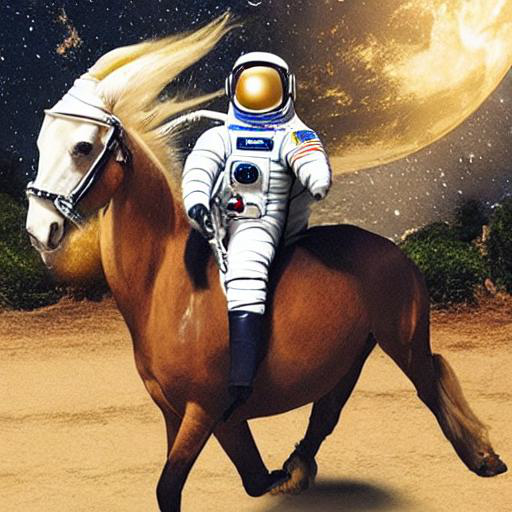

In [4]:

def add_gaussian_noise(image, mean=0, std=25): # std: standard deviation (magnitude of the noise)
    img_array = np.array(image)
    h, w, c = img_array.shape
    noise = np.random.normal(mean, std, (h, w, c)).astype(np.uint8)
    noisy_image = np.clip(img_array + noise, 0, 255)
    return Image.fromarray(noisy_image)

# Load the original image
inp_img = Image.open(r"astronaut_rides_horse-1971a27b.jpg")
display(inp_img)

In [5]:
import matplotlib.pyplot as plt
noisy_img = Image.open(r"astronaut_rides_horse-1971a27b.jpg")

#display(noisy_img)

@interact(std=(0, 100, 1))
def update(std=5):
    noisy_img = add_gaussian_noise(inp_img, 0, std)
    plt.imshow(noisy_img)
    plt.axis("off")
    plt.show()

interactive(children=(IntSlider(value=5, description='std'), Output()), _dom_classes=('widget-interact',))

In [6]:
# below is slow updating
from plotly.subplots import make_subplots
noisy_img = Image.open(r"astronaut_rides_horse-1971a27b.jpg")

#display(noisy_img)
fig_noisy_img = go.FigureWidget()
fig_noisy_img.add_trace(go.Image(z=np.array(noisy_img)))

@interact(std=(0, 100, 10), continuous_update=False)
def update(std=10):
    print(f"std={std}")
    noisy_img = add_gaussian_noise(inp_img, 0, std)
    with fig_noisy_img.batch_update():
        fig_noisy_img.data[0].z=np.array(noisy_img)
        fig_noisy_img.update_xaxes(showticklabels=False)
        fig_noisy_img.update_yaxes(showticklabels=False)
        fig_noisy_img.layout.title = f"Noise level (std): {std}"
        
display(fig_noisy_img)

interactive(children=(IntSlider(value=10, description='std', step=10), Output()), _dom_classes=('widget-intera…

FigureWidget({
    'data': [{'type': 'image',
              'uid': 'ac7d57a9-35a0-4401-9d9b-eaf39bc7951c',
   …

# Image denoising

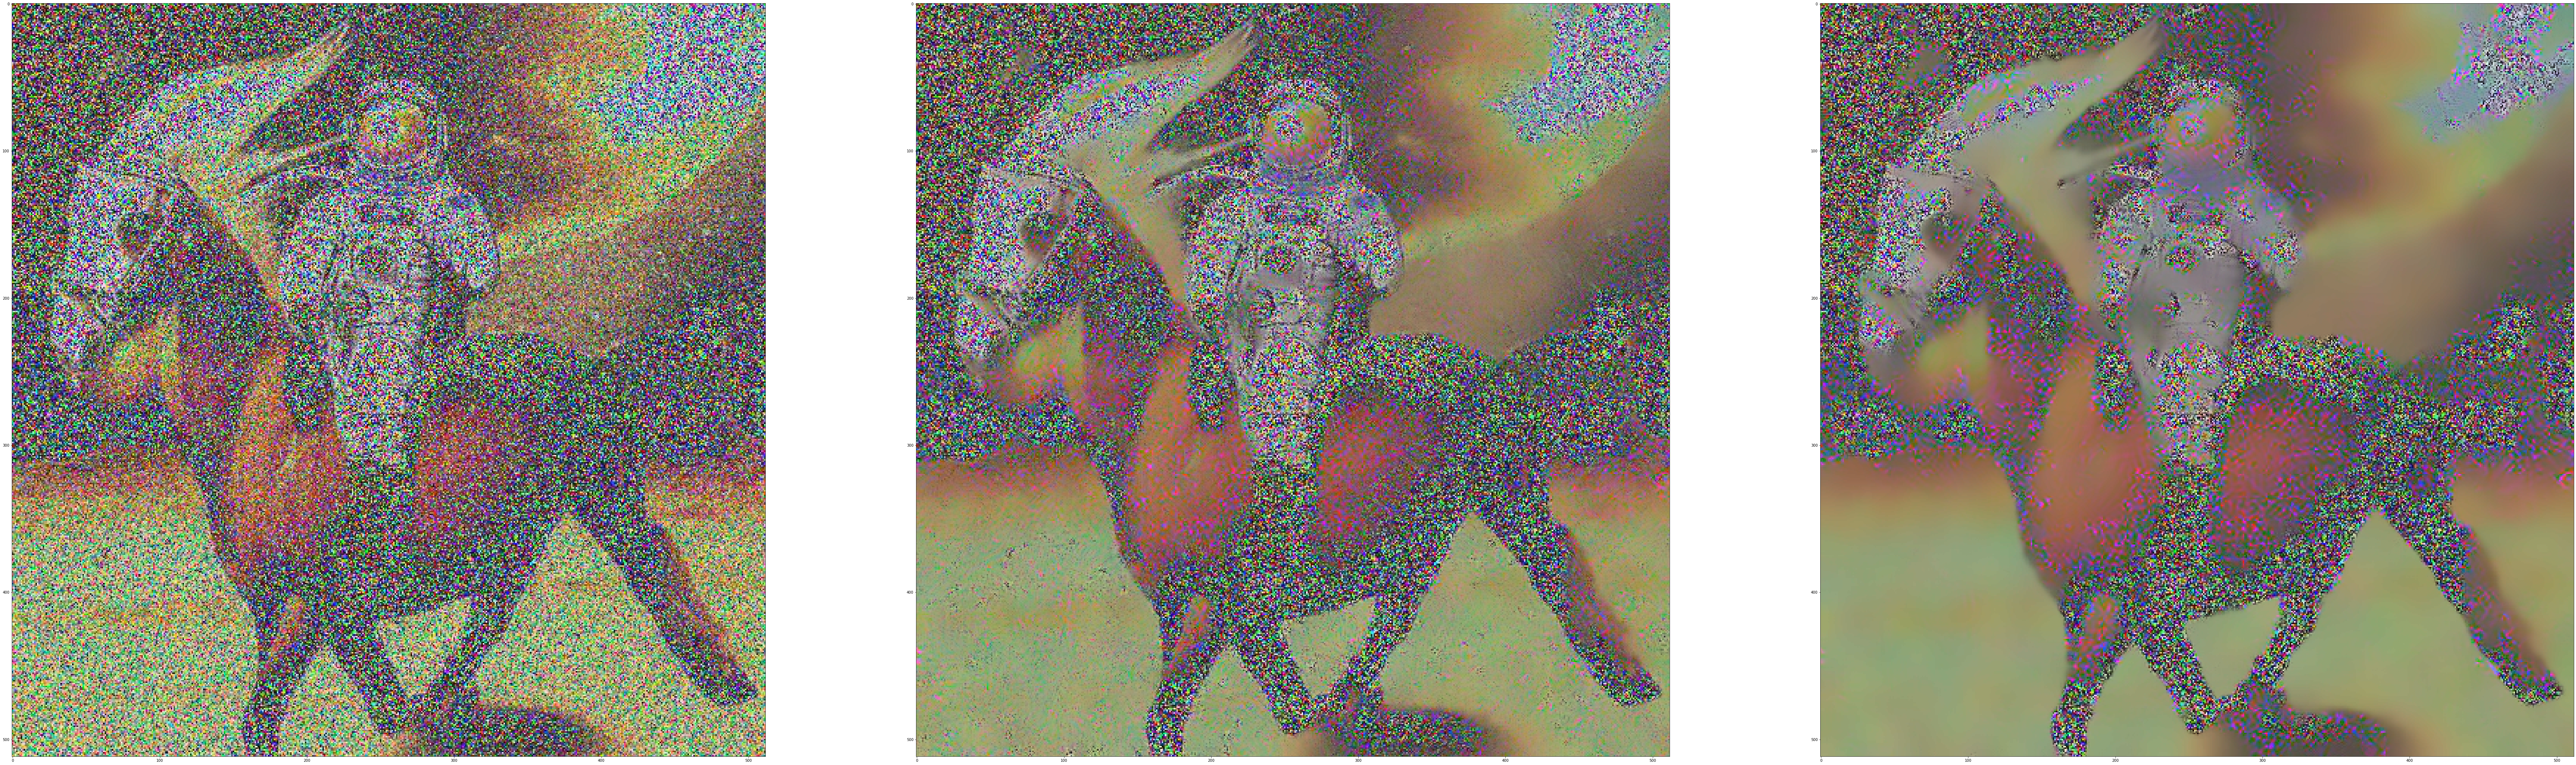

In [8]:
# Here we demo a very classic algorithm -- which do NOT use any deep learning
# we can see it does remove noisy pointing -- via averaging hence image details are erased -- a huge limitation

import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
img = cv2.imread('astro-noisy.jpg')
dst = img.copy()
plt.figure(figsize=(128, 128))

n = 3

plt.subplot(int(f"1{n}1")),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

for i in range(2, n + 1):
    dst = cv2.fastNlMeansDenoisingColored(dst,None,20,10,7,21) # default pararm value 10 will cause denoising barely do anything
    plt.subplot(int(f"1{n}{i}")),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    
plt.show()